# Explore here

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#verificamos filas repetidos o df.duplicated().sum()
(df[df.duplicated(keep = False)])

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
#eliminar filas repetidas
df.drop(581, axis=0, inplace=True)

In [9]:
(df[df.duplicated(keep = False)])

,age,sex,bmi,children,smoker,region,charges


In [10]:
#buscar valores nulos
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
df.shape

(1337, 7)

In [13]:
#analisis univariante, categorico
import matplotlib.pyplot as plt
import seaborn as sns 

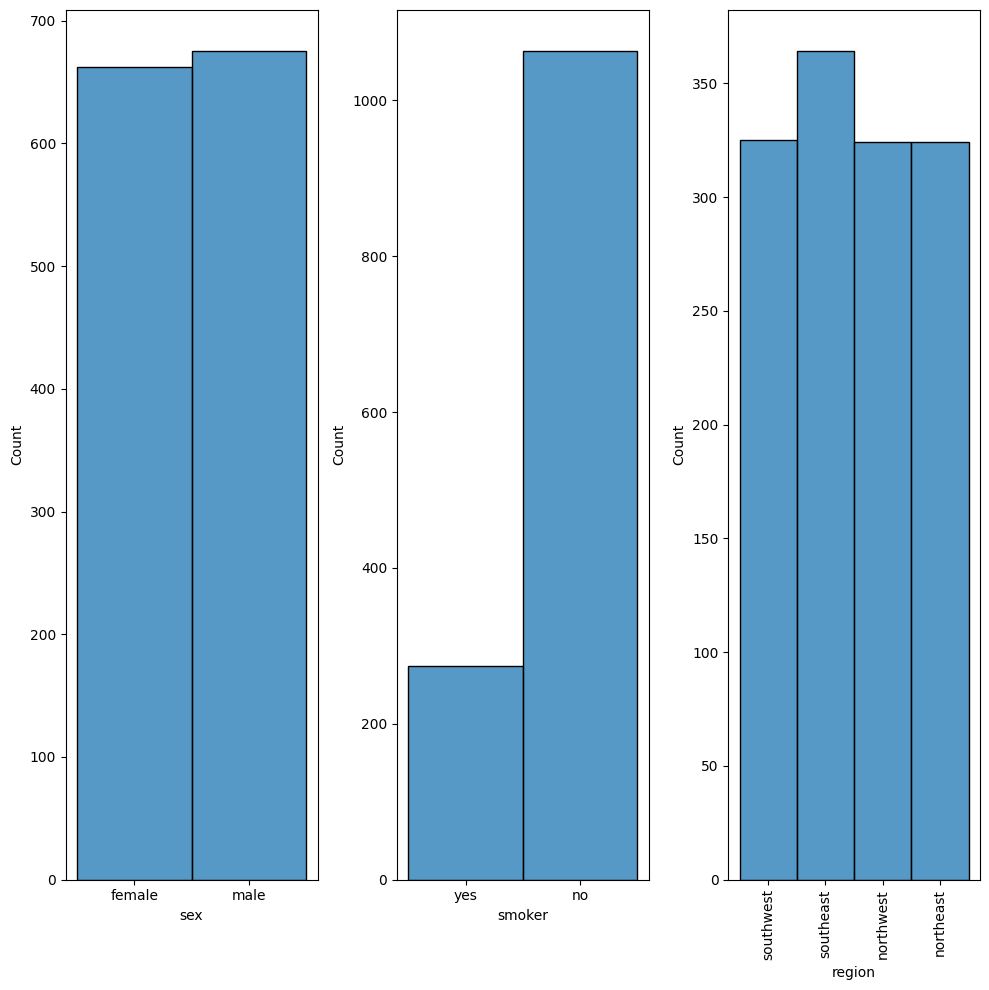

In [14]:
#crear gráficos
fig, axis = plt.subplots(1,3, figsize=(10,10))

sns.histplot(ax= axis[0], data= df,x= 'sex')
sns.histplot(ax= axis[1], data= df,x= 'smoker')
sns.histplot(ax= axis[2], data= df,x= 'region')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

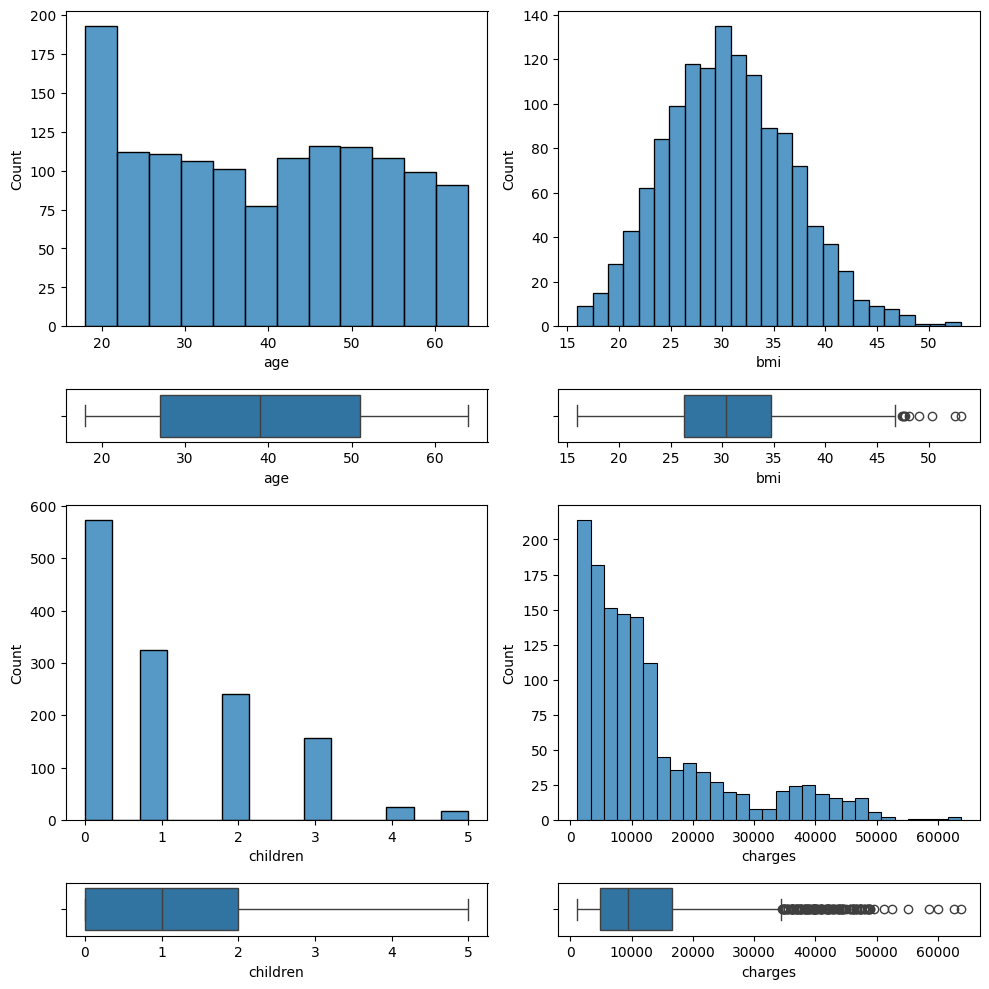

In [15]:
#analisis univariante, numerico 
fig, axis = plt.subplots(4,2,figsize=(10,10),gridspec_kw={'height_ratios':[6,1,6,1]})

sns.histplot(ax=axis[0,0], data= df,x= 'age')
sns.boxplot(ax=axis[1,0], data=df, x='age')

sns.histplot(ax=axis[0,1], data= df,x= 'bmi')
sns.boxplot(ax=axis[1,1], data=df, x='bmi')

sns.histplot(ax=axis[2,0], data= df,x= 'children')
sns.boxplot(ax=axis[3,0], data=df, x='children')

sns.histplot(ax=axis[2,1], data= df,x= 'charges')
sns.boxplot(ax=axis[3,1], data=df, x='charges')



plt.tight_layout()
plt.show

<Axes: >

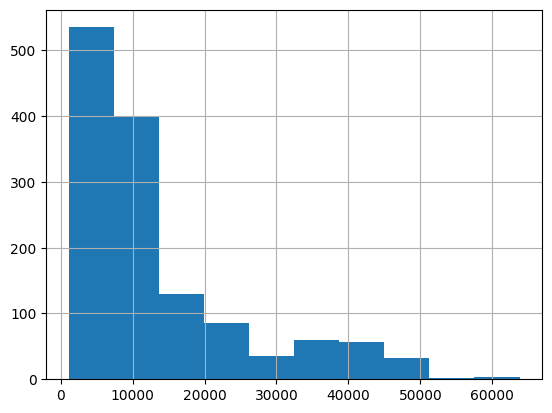

In [16]:
df['charges'].hist()

In [17]:
df[df['charges']<0].count()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
#transformar variables categoricas en numericas
df['sex_n'] = pd.factorize(df['sex'])[0]
df['smoker_n'] = pd.factorize(df['smoker'])[0]
df['region_n'] = pd.factorize(df['region'])[0]

In [19]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
df['region_n'].unique()

array([0, 1, 2, 3])

In [21]:
df

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


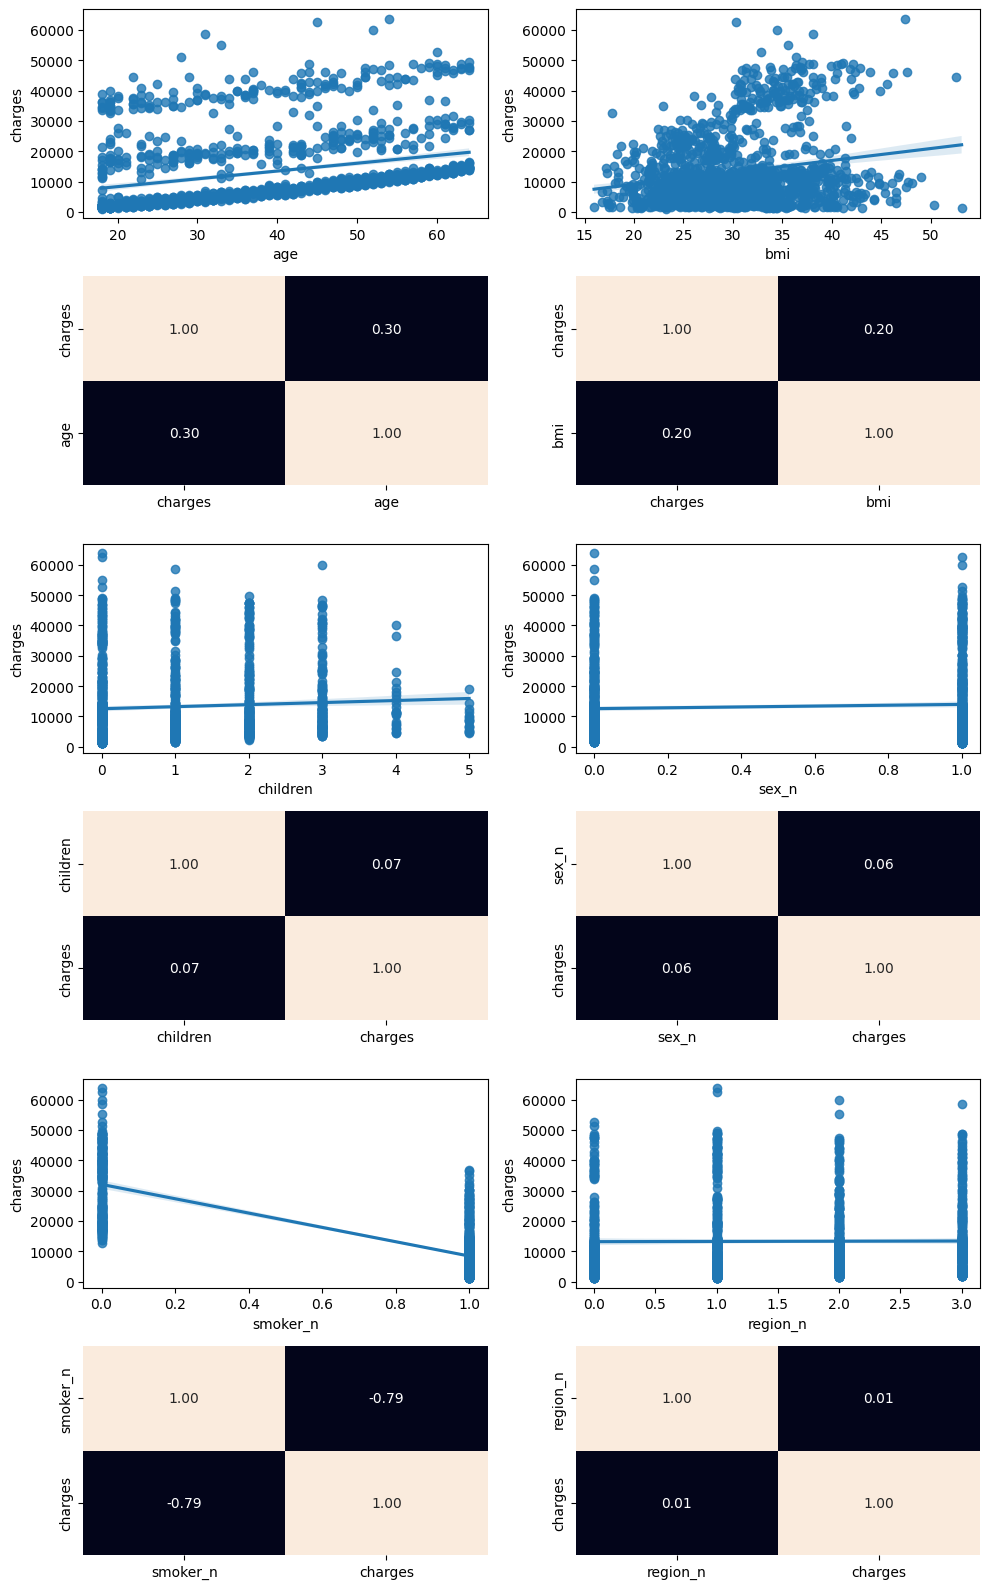

In [22]:
#analisis numerico-numerico
fig, axis = plt.subplots(6,2,figsize=(10,16))

sns.regplot(ax = axis[0,0], data=df, x='age', y= 'charges')
sns.heatmap(df[['charges', 'age']].corr(),annot=True,fmt='.2f', ax=axis[1,0],cbar=False)

sns.regplot(ax = axis[0,1], data=df, x='bmi', y= 'charges')
sns.heatmap(df[['charges', 'bmi']].corr(),annot=True,fmt='.2f', ax=axis[1,1],cbar=False)

sns.regplot(ax = axis[2,0], data=df, x='children', y= 'charges')
sns.heatmap(df[['children', 'charges']].corr(),annot=True,fmt='.2f', ax=axis[3,0],cbar=False)

sns.regplot(ax = axis[2,1], data=df, x='sex_n', y= 'charges')
sns.heatmap(df[['sex_n', 'charges']].corr(),annot=True,fmt='.2f', ax=axis[3,1],cbar=False)

sns.regplot(ax = axis[4,0], data=df, x='smoker_n', y= 'charges')
sns.heatmap(df[['smoker_n', 'charges']].corr(),annot=True,fmt='.2f', ax=axis[5,0],cbar=False)

sns.regplot(ax = axis[4,1], data=df, x='region_n', y= 'charges')
sns.heatmap(df[['region_n', 'charges']].corr(),annot=True,fmt='.2f', ax=axis[5,1],cbar=False)

plt.tight_layout()
plt.show()

In [23]:
df

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [24]:
del(df['sex'])

In [25]:
del(df['smoker'])
del(df['region'])

In [26]:
df

,age,bmi,children,charges,sex_n,smoker_n,region_n
0,19,27.900,0,16884.92400,0,0,0
1,18,33.770,1,1725.55230,1,1,1
2,28,33.000,3,4449.46200,1,1,1
3,33,22.705,0,21984.47061,1,1,2
4,32,28.880,0,3866.85520,1,1,2
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,2
1334,18,31.920,0,2205.98080,0,1,3
1335,18,36.850,0,1629.83350,0,1,1
1336,21,25.800,0,2007.94500,0,1,0


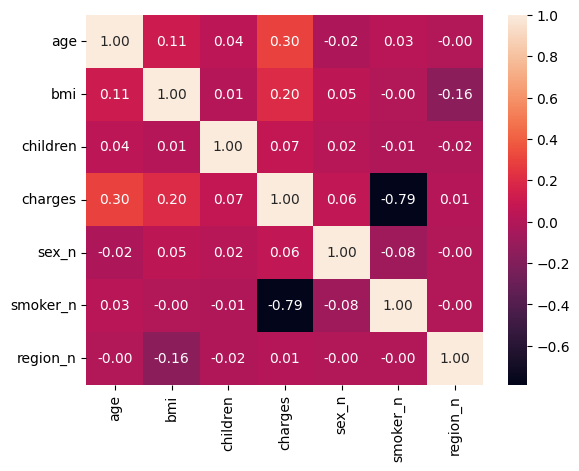

In [27]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

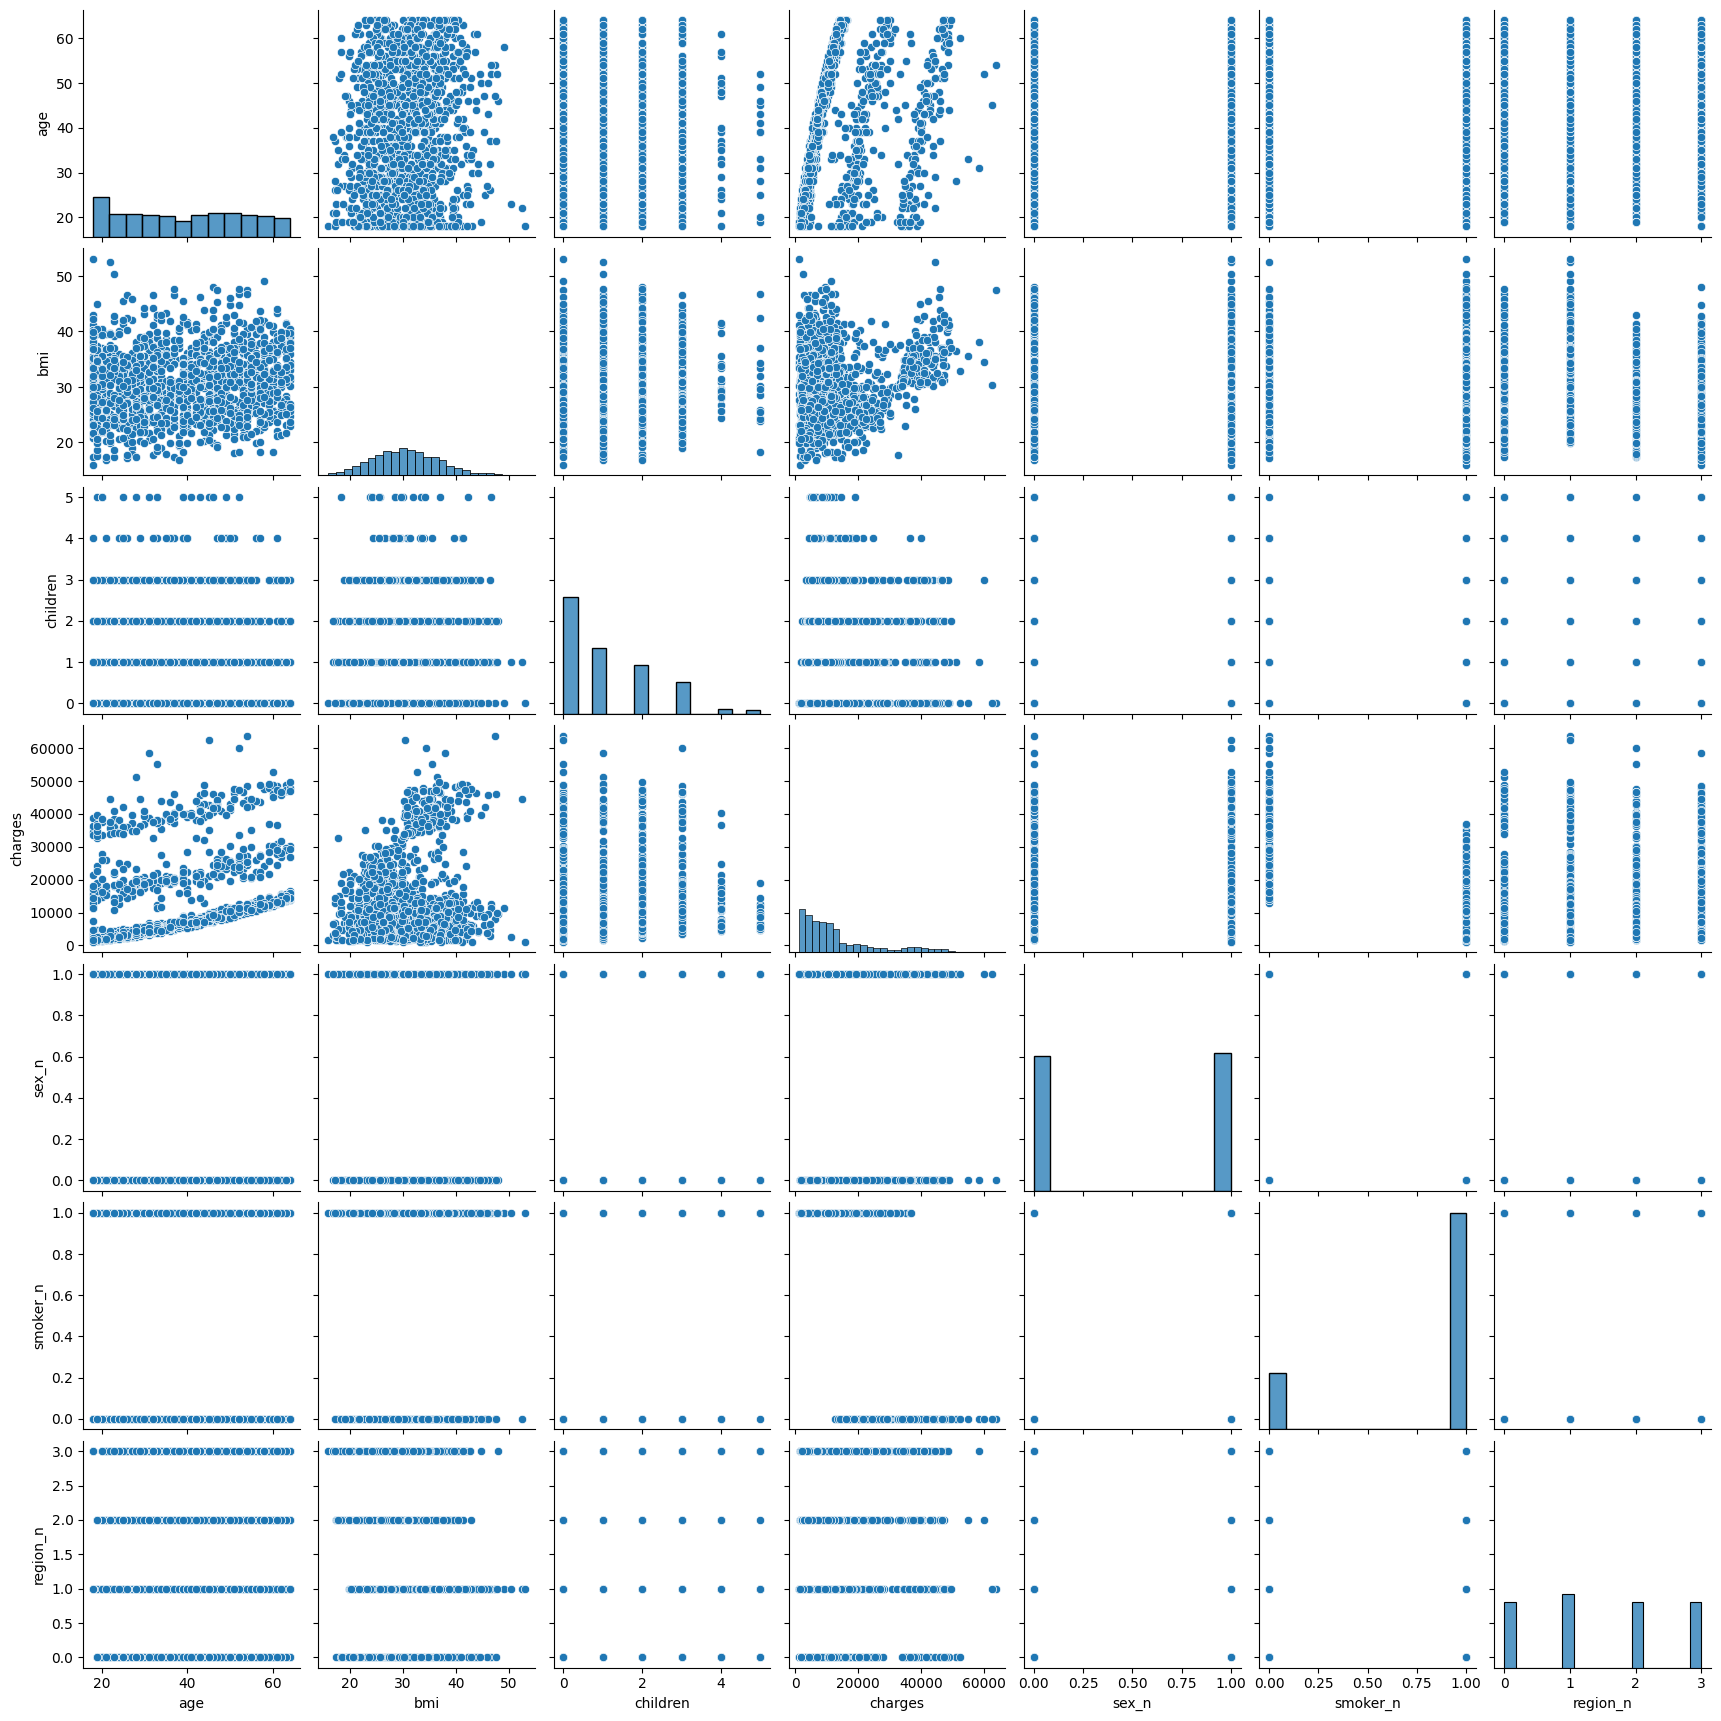

In [28]:

sns.pairplot(data=df)

In [29]:
#ingeneria de caracteristicas
df.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


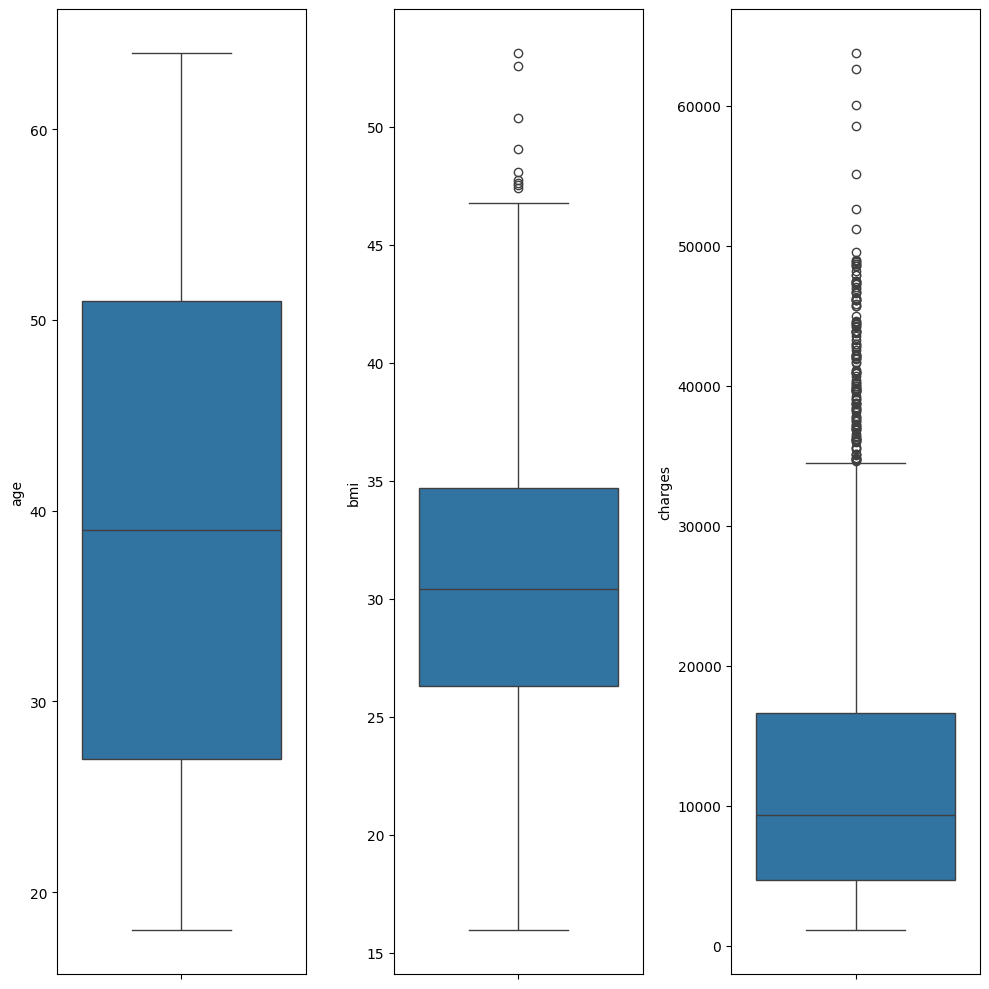

In [30]:
#conocer outlier en boxplot
fig, axis = plt.subplots(1,3, figsize=(10,10))

sns.boxplot(ax=axis[0], data=df, y= 'age')
sns.boxplot(ax=axis[1], data=df, y= 'bmi')
sns.boxplot(ax=axis[2],data=df, y= 'charges')

plt.tight_layout()
plt.show()

In [31]:
df['bmi'].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [32]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [33]:
df.drop('region_n', axis=1, inplace= True)

In [34]:
#rango intercuartilico
def analisis_ric(columna,df):
    estadisticas = df[columna].describe()
    ric = estadisticas ['75%'] - estadisticas ['25%']
    lim_sup = estadisticas ['75%'] + 1.5 * ric
    lim_inf = estadisticas ['25%'] - 1.5 * ric
    print(f'Superior {lim_sup} e inferior { lim_inf}')

In [35]:
analisis_ric('bmi', df)

Superior 47.31500000000001 e inferior 13.674999999999994


In [36]:
analisis_ric('charges', df)

Superior 34524.777625 e inferior -13120.716174999998


In [37]:
df['charges'].count()

np.int64(1337)

In [38]:
df[df['charges']<1000].count()

age         0
bmi         0
children    0
charges     0
sex_n       0
smoker_n    0
dtype: int64

In [39]:
df2= df.copy()

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   bmi       1337 non-null   float64
 2   children  1337 non-null   int64  
 3   charges   1337 non-null   float64
 4   sex_n     1337 non-null   int64  
 5   smoker_n  1337 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 73.1 KB


In [41]:
from sklearn.model_selection import train_test_split
X= df.drop('charges', axis=1)
y= df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
print(f'Los coeficientes del modelo son: {model.coef_}')
print(f'El intercepto del modelo es: {model.intercept_}')

Los coeficientes del modelo son: [   249.09521752    305.59649519    537.9633666     -85.02704092
 -23051.36812442]
El intercepto del modelo es: 11830.316462846178


Cada uno de estos coeficientes esta diciendo que va a cobrar el seguro una cierta cantidad cada vez que estos coeficientes avanzan en 1 su valor.Si nadie tiene los atributos podemos decir que la empresa empieza cobrando 11830 dolares

In [44]:
#predecir el modelo
y_pred = model.predict(X_test)

In [45]:
#siempre comparar modelo con metricas
from sklearn.metrics import mean_squared_error, r2_score
print(f'El MSE es: {mean_squared_error(y_pred, y_test)}')#error cuadratico medio, entonces se compara la prediccion con la realidad
print(f'El R2 es: {r2_score(y_pred, y_test)}')#comparar mi prediccion con la realidad

El MSE es: 35901914.11461986
El R2 es: 0.6858431856259595
